<a href="https://colab.research.google.com/github/egabrielvice/DATA602_ipynb/blob/8/assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Course**: DATA 602

# **Name**: Escarlet Gabriel Vicente

# **Weeks 10 & 11 – matplotlib & seaborn**



# **Introduction**

For this assignment, a public COVID-19 patient dataset from Kaggle was selected to explore patterns and relationships through data visualization using **Matplotlib** and **Seaborn**.

**Dataset source:**
[https://www.kaggle.com/datasets/meirnizri/covid19-dataset](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

This dataset contains anonymized patient-level information provided by the Mexican government, including demographic characteristics (e.g., **sex**, **age**), pre-existing medical conditions (e.g., **diabetes**, **hypertension**, **obesity**), and indicators of severe outcomes such as **ICU admission** and **intubation**.

The dataset was chosen because it includes a strong mix of numeric and categorical variables that support multiple types of visualizations (distributions, comparisons across groups, and relationships between variables). In addition, the dataset includes coded missing values (e.g., **97** and **99**), making it realistic and suitable for demonstrating data cleaning prior to visualization.

# **Data Exploration**

In order to understand the structure, content, and overall quality of the dataset before creating visualizations, an initial data exploration is conducted. This step identifies variable types, missing values, and summary patterns that guide later visualization decisions.

## **1. Load Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Load Data**

In [ ]:
df = pd.read_csv("/content/Covid Data.csv")
df = df.sample(n=100000, random_state=42)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
781974,2,12,1,1,9999-99-99,97,2,35,2,2,...,2,2,2,2,2,2,2,2,7,97
937737,2,12,2,1,9999-99-99,97,2,28,97,2,...,2,2,1,2,2,2,2,2,7,97
907828,2,12,1,1,9999-99-99,97,2,7,2,2,...,2,2,2,2,2,2,2,2,7,97
784628,2,12,1,1,9999-99-99,97,2,35,2,1,...,2,2,2,2,2,2,2,2,7,97
662460,2,12,1,1,9999-99-99,97,2,33,2,2,...,2,2,2,2,2,2,2,2,5,97


## **3. Structure & Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 781974 to 435719
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 100000 non-null  int64 
 1   MEDICAL_UNIT          100000 non-null  int64 
 2   SEX                   100000 non-null  int64 
 3   PATIENT_TYPE          100000 non-null  int64 
 4   DATE_DIED             100000 non-null  object
 5   INTUBED               100000 non-null  int64 
 6   PNEUMONIA             100000 non-null  int64 
 7   AGE                   100000 non-null  int64 
 8   PREGNANT              100000 non-null  int64 
 9   DIABETES              100000 non-null  int64 
 10  COPD                  100000 non-null  int64 
 11  ASTHMA                100000 non-null  int64 
 12  INMSUPR               100000 non-null  int64 
 13  HIPERTENSION          100000 non-null  int64 
 14  OTHER_DISEASE         100000 non-null  int64 
 15  CARDIOVASCULAR   

## **4. Summary Statistics (means, quartiles, etc.)**

In [ ]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.631480,8.950390,1.500240,1.189950,79.593090,3.346480,41.827180,49.831550,2.169880,2.244020,2.230700,2.276510,2.11449,2.41924,2.242630,2.116580,2.250360,2.186080,5.305420,79.623870
std,0.482406,3.729038,0.500002,0.392263,36.811348,11.908334,16.917231,47.510549,5.275477,4.974531,5.004495,5.269682,5.10288,6.53500,5.021318,5.102628,5.075512,5.066252,1.880349,36.765375
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,97.000000,2.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000,3.000000,97.000000
50%,2.000000,12.000000,2.000000,1.000000,97.000000,2.000000,40.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000,6.000000,97.000000
75%,2.000000,12.000000,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,13.000000,2.000000,2.000000,99.000000,99.000000,118.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.00000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


## **5. Missing / Invalid Value Check**
The dataset uses special numeric codes (such as 97 and 99) to represent missing or unknown values rather than standard nulls. Identifying these coded values is essential prior to visualization, as their inclusion could distort distributions and comparisons.

The following step quantifies the frequency of these coded values across variables to determine which columns require cleaning before plotting.

In [ ]:
df.isin([97, 99]).sum().sort_values(ascending=False).head(15)

,0
ICU,81711
INTUBED,81696
PREGNANT,50024
PNEUMONIA,1525
AGE,22
DATE_DIED,0
PATIENT_TYPE,0
SEX,0
MEDICAL_UNIT,0
USMER,0


### **Data Exploration Findings**

The initial exploration of the dataset revealed several characteristics that directly impact how the data must be prepared for visualization. Although no standard null values were present, many variables use special numeric codes such as 97 and 99 to represent missing or unknown information. These codes appear frequently in key outcome variables, including ICU, INTUBED, PREGNANT, and PNEUMONIA, and would distort distributions if left unaddressed.

In addition, many variables are stored as numeric values even though they represent categorical states (for example, 1 = yes and 2 = no), indicating the need for clearer labeling prior to plotting. The AGE variable also contains a small number of invalid coded values that must be removed to avoid misleading histograms.

These findings confirm that targeted data cleaning and relabeling are necessary before creating meaningful visualizations, and they guide the data wrangling steps applied in the next section.

# **Data Wrangling**

Data wrangling is performed to improve interpretability and ensure that the dataset is suitable for visualization. This includes handling coded missing values and creating human-readable labels for key categorical variables used in plots.

## **1. Replace Coded Missing Values**

Coded missing values (97 and 99) are replaced with NaN to ensure they are properly excluded from calculations and visualizations.

In [ ]:
df = df.replace({97: np.nan, 99: np.nan})

## **2. Create Human-Readable Labels**

Several variables in the dataset are encoded numerically. To improve readability and interpretation in visualizations, descriptive labels are created for selected categorical variables.

In [ ]:
df["SEX_label"] = df["SEX"].map({1: "Female", 2: "Male"})
df["ICU_label"] = df["ICU"].map({1: "Yes", 2: "No"})
df["PATIENT_TYPE_label"] = df["PATIENT_TYPE"].map({1: "Returned Home", 2: "Hospitalized"})

df[["SEX", "SEX_label", "ICU", "ICU_label", "PATIENT_TYPE", "PATIENT_TYPE_label"]].head()

,SEX,SEX_label,ICU,ICU_label,PATIENT_TYPE,PATIENT_TYPE_label
781974,1,Female,NaN,NaN,1,Returned Home
937737,2,Male,NaN,NaN,1,Returned Home
907828,1,Female,NaN,NaN,1,Returned Home
784628,1,Female,NaN,NaN,1,Returned Home
662460,1,Female,NaN,NaN,1,Returned Home


## **3. Create a “High Risk” Style Indicator (Optional Derived Variable)**
A simple derived indicator is created for visualization: a patient is flagged if they have at least one major comorbidity (**diabetes**, **hypertension**, or **obesity**).

In [ ]:
# Define major comorbidity columns
comorb_cols = ["DIABETES", "HIPERTENSION", "OBESITY"]

# Ensure these columns are numeric (1 = Yes, 2 = No)
for c in comorb_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Create derived indicator for any major comorbidity
df["ANY_MAJOR_COMORBIDITY"] = np.where(
    (df["DIABETES"] == 1) |
    (df["HIPERTENSION"] == 1) |
    (df["OBESITY"] == 1),
    "Yes",
    "No"
)

df[["DIABETES", "HIPERTENSION", "OBESITY", "ANY_MAJOR_COMORBIDITY"]].head()


,DIABETES,HIPERTENSION,OBESITY,ANY_MAJOR_COMORBIDITY
781974,2,2,2,No
937737,2,1,2,Yes
907828,2,2,2,No
784628,1,2,2,Yes
662460,2,2,2,No


# **Visualizations**
The primary objective of this section is to explore patterns and relationships in the data using **Matplotlib** and **Seaborn**, while demonstrating control over plot properties and effective visual communication.

## **Part 1: Matplotlib (2+ plots with 5+ properties)**
### **Plot 1 (Matplotlib): ICU Admission Rate by Sex (Bar Chart)**

**What this plot represents:**
This bar chart compares the proportion of ICU admissions (**Yes/No**) across **Female vs Male** patients.

**Properties showcased (Matplotlib):**

* **Title + axis labels**
* **Legend position change**
* **Legend font size change**
* **Axis tick label modification (rotation)**
* **Annotation added (percent labels)**


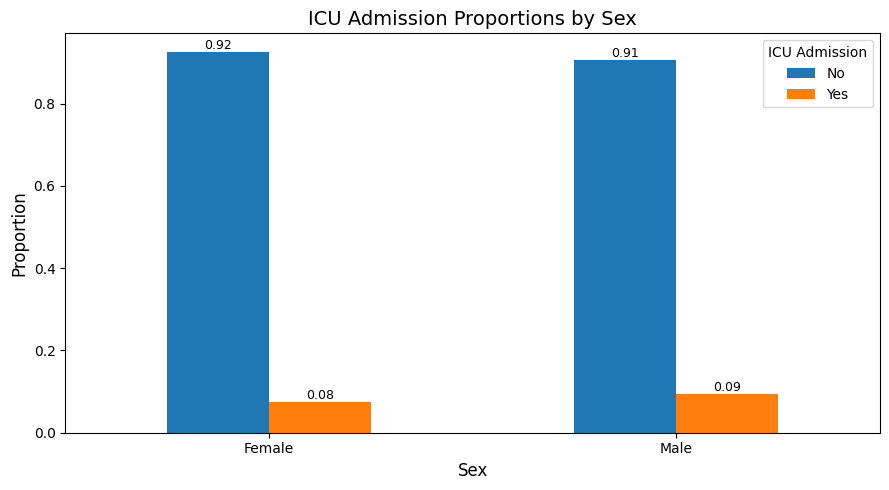

In [ ]:
# Prepare proportions
icu_by_sex = (
    df.dropna(subset=["SEX_label", "ICU_label"])
      .groupby(["SEX_label", "ICU_label"])
      .size()
      .unstack()
)

icu_prop = icu_by_sex.div(icu_by_sex.sum(axis=1), axis=0)

# Plot ICU admission proportions by sex
fig, ax = plt.subplots(figsize=(9, 5))
icu_prop.plot(kind="bar", ax=ax)

ax.set_title("ICU Admission Proportions by Sex", fontsize=14)
ax.set_xlabel("Sex", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)

# Modify tick labels
plt.xticks(rotation=0)

# Legend customization (position + font size)
ax.legend(title="ICU Admission", loc="upper right", fontsize=10)

# Add annotations to bars
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(
            f"{height:.2f}",
            (p.get_x() + p.get_width() / 2, height),
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.tight_layout()
plt.show()

I|**Interpretation:**
The bar chart shows that ICU admissions are proportionally higher among male patients compared to female patients. While the majority of patients in both groups were not admitted to the ICU, males exhibit a noticeably higher share of ICU admissions. This indicates that sex may be associated with differences in COVID-19 severity, a pattern consistent with clinical findings reported during the pandemic.

### **Plot 2 (Matplotlib): Age Distribution by Hospitalization Status (Histogram)**

**What this plot represents:**
This histogram compares how **age** is distributed for patients who were **Hospitalized** versus those who **Returned Home**.

**Properties showcased (Matplotlib):**

* **Title + axis labels**
* **Legend placed outside plot**
* **Legend font size changed**
* **Line width customization (edgecolor/linewidth)**
* **Axis tick label customization**

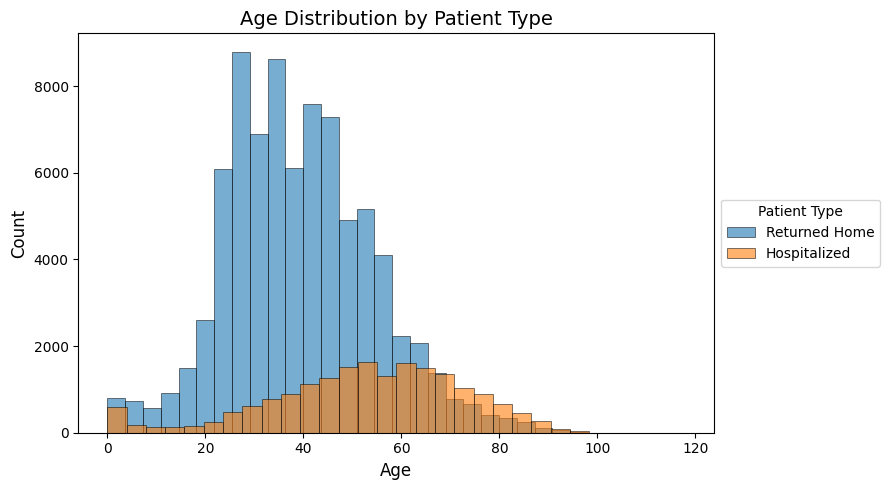

In [ ]:
# Prepare data
plot_df = df.dropna(subset=["AGE", "PATIENT_TYPE_label"])

# Separate age distributions by patient type
age_home = plot_df.loc[
    plot_df["PATIENT_TYPE_label"] == "Returned Home", "AGE"
]

age_hosp = plot_df.loc[
    plot_df["PATIENT_TYPE_label"] == "Hospitalized", "AGE"
]

# Plot age distributions
fig, ax = plt.subplots(figsize=(9, 5))

ax.hist(
    age_home,
    bins=30,
    alpha=0.6,
    label="Returned Home",
    edgecolor="black",
    linewidth=0.6
)

ax.hist(
    age_hosp,
    bins=30,
    alpha=0.6,
    label="Hospitalized",
    edgecolor="black",
    linewidth=0.6
)

ax.set_title("Age Distribution by Patient Type", fontsize=14)
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Tick customization
ax.tick_params(axis="x", rotation=0)

# Legend placed outside the plot
ax.legend(
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title="Patient Type"
)

plt.tight_layout()
plt.show()


**Interpretation:**
The age distributions indicate a clear separation between patients who were hospitalized and those who returned home. Hospitalized patients tend to be older on average, with the distribution shifted toward higher age values. This pattern shows that age is a significant factor associated with hospitalization risk.

## **Part 2: Seaborn (Recreate the above plots)**

### **Plot 1 (Seaborn): ICU Admission by Sex**

**What this plot represents:**
This plot shows ICU admission rates across sex groups using Seaborn’s higher-level plotting functions.

**Properties showcased (Seaborn):**

* Title + axis labels
* Legend position change
* Tick label formatting
* Seaborn styling and grouped visualization

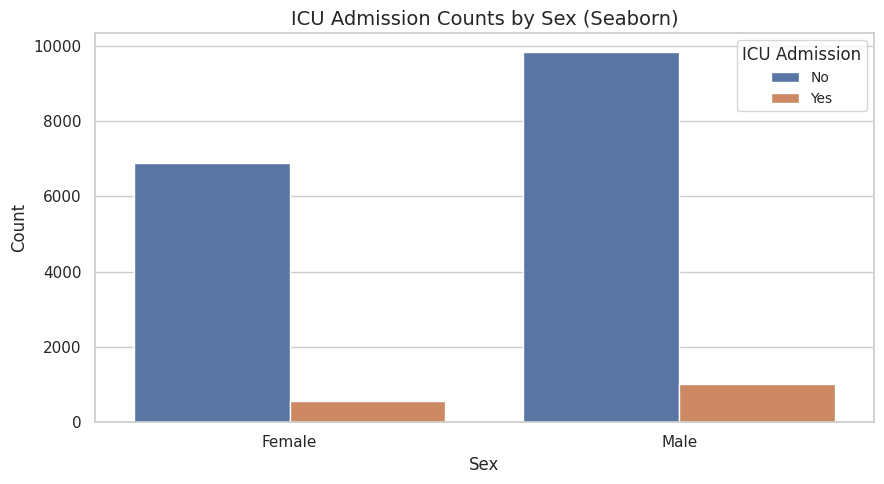

In [ ]:
# Apply seaborn style
sns.set(style="whitegrid")

# Prepare data using existing labeled columns
sb_df = df.dropna(subset=["SEX_label", "ICU_label"])

plt.figure(figsize=(9, 5))

ax = sns.countplot(
    data=sb_df,
    x="SEX_label",
    hue="ICU_label"
)

ax.set_title("ICU Admission Counts by Sex (Seaborn)", fontsize=14)
ax.set_xlabel("Sex", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Legend customization
plt.legend(title="ICU Admission", loc="upper right", fontsize=10)

plt.tight_layout()
plt.show()

**Interpretation:**
This count-based visualization reinforces the proportional findings observed in the Matplotlib chart. Male patients not only represent a larger absolute number of ICU admissions but also show a stronger imbalance between ICU and non-ICU cases. The consistency between proportional and count-based plots increases confidence in the observed pattern.

### **Plot 2 (Seaborn): Age Distribution by Hospitalization Status**

**What this plot represents:**
This plot visualizes age distributions by patient type using Seaborn’s histogram interface.

**Properties showcased (Seaborn):**

* Title + axis labels
* Legend placement
* Seaborn automatic aesthetics
* Distribution comparison using `hue`

/tmp/ipython-input-3411013878.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


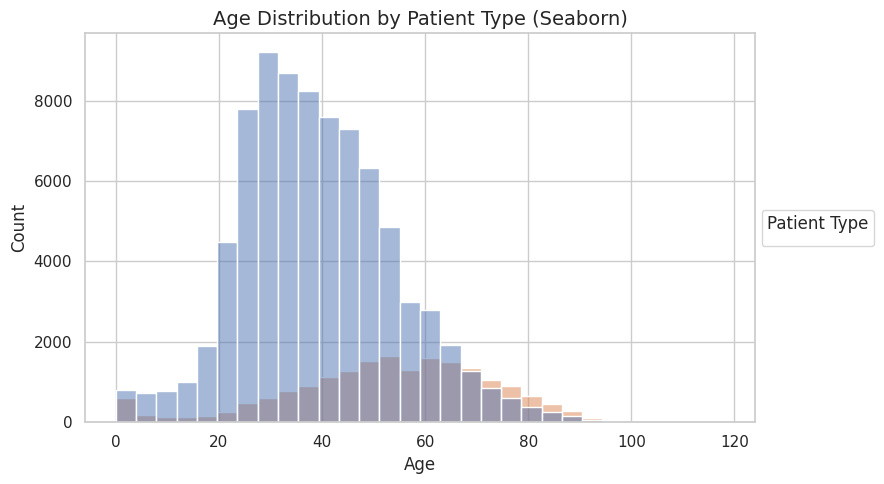

In [ ]:
# Prepare data
sb_df2 = df.dropna(subset=["AGE", "PATIENT_TYPE_label"])

plt.figure(figsize=(9, 5))

ax = sns.histplot(
    data=sb_df2,
    x="AGE",
    hue="PATIENT_TYPE_label",
    bins=30,
    multiple="layer",
    kde=False
)

ax.set_title("Age Distribution by Patient Type (Seaborn)", fontsize=14)
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Legend placed outside the plot
plt.legend(
    title="Patient Type",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.tight_layout()
plt.show()

**Interpretation:**
The Seaborn histogram highlights the same age-related trend using layered distributions. Hospitalized patients are more concentrated at older ages, while younger patients are more likely to have been discharged home. Seaborn’s smoother visual presentation makes it easier to compare overlapping distributions, reinforcing the relationship between age and hospitalization status.

## **Part 3: Matplotlib vs Seaborn (Comparison)**

Based on the visualizations created in this assignment, **matplotlib** and **seaborn** exhibit different strengths and tradeoffs.

**Matplotlib** required more explicit control over plot elements such as legends, annotations, axis labels, and layout adjustments. This provided greater flexibility but resulted in more verbose code, especially when fine-tuning plot appearance.

**Seaborn**, in contrast, generated cleaner and more visually appealing plots with fewer lines of code. Grouping by categorical variables and applying consistent styling was more intuitive, making it well suited for exploratory analysis and presentation-ready visuals.

Overall, matplotlib was better suited for detailed customization, while seaborn offered efficiency and improved default aesthetics. Using both libraries together allowed for flexible and effective communication of patterns in the COVID-19 dataset.

# **Conclusion**

This dataset includes a combination of demographic information and clinical indicators that work well for visual exploration. During the initial review, it became clear that several variables used coded values to represent missing or unknown information, which needed to be addressed before creating meaningful visualizations. Once the data was cleaned, the plots provided a clearer picture of how patient characteristics and outcomes differ across groups.

The visualizations showed noticeable differences in ICU admission and hospitalization patterns, as well as clear contrasts in age distributions between patients who were hospitalized and those who returned home. These plots demonstrate how visual tools can quickly highlight important patterns in complex health data that might be less obvious in raw tables.

With more time, this analysis could be expanded by examining additional outcomes such as intubation or pneumonia, exploring comorbidity combinations in greater detail, or creating more advanced visualizations like heatmaps or faceted plots by age group and medical condition.